**Automatic Keyword Extraction**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from gensim.models import Word2Vec
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import random
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#data=pd.read_csv("c1.csv",error_bad_lines=False,encoding= 'unicode_escape')
#data['category'].value_counts()

FileNotFoundError: ignored

**PREPROCESSING**

In [ ]:

#df1=data.loc[data.category == "ENTERTAINMENT"]
#df=df1[['headline']]
#df=df.sample(n=5100)
#df = df[df['headline'].notnull()]
df = pd.read_csv("D0601A.csv",error_bad_lines=False,usecols =["sent"],encoding= 'unicode_escape')
df[df['sent'].duplicated(keep=False)].sort_values('sent').head(8)
headlines = df['sent'].tolist()
# remove stopwords
stopwords_set = set(stopwords.words('english'))#if tok not in stopwords_set
headlines = [
    [tok for tok in headline.split() if tok not in stopwords_set ] for headline in headlines
]
# remove single word headlines
headlines = [hl for hl in headlines if len(hl) > 1]
# show results
headlines[0:20]

[['SPARTA,',
  'Ga.',
  'By',
  '10',
  'clock',
  'typical',
  "summer's",
  'morning,',
  'Hancock',
  'County',
  'almost',
  'deserted.'],
 ['A',
  'children',
  'play',
  'overgrown',
  'backyards',
  'full',
  'junk',
  'cars',
  'rotting',
  'timbers,',
  'older',
  'people',
  'fan',
  'older',
  'people',
  'sagging',
  'porches.'],
 ['But',
  'almost',
  'anyone',
  'works',
  'left',
  'Hancock',
  'County',
  'hours',
  'before,',
  'virtually',
  'jobs',
  'Hancock',
  'County.'],
 ['The',
  'term',
  '``pocket',
  "poverty''",
  'cannot',
  'begin',
  'describe',
  'overwhelming',
  'stillness',
  'county',
  'economy:',
  'deserted',
  'roads',
  'store',
  'aisles,',
  'fertile',
  'old',
  'cotton',
  'fields',
  'untilled',
  'overgrown.'],
 ['Every',
  'employer',
  'size',
  'left,',
  'new',
  'ones',
  'seeking',
  'cheap',
  'land',
  'look',
  'Hancock',
  "County's",
  'statistics',
  'half',
  'adults',
  'finish',
  'high',
  'school,',
  'seven',
  'ten',
  

**Word2Vec**

In [ ]:

X = Word2Vec(headlines, window=5, min_count=1)

In [ ]:
#word_features = list(X.wv.vocab)
print(list(X.wv.vocab))
l=len(list(X.wv.vocab))
print(l)

['SPARTA,', 'Ga.', 'By', '10', 'clock', 'typical', "summer's", 'morning,', 'Hancock', 'County', 'almost', 'deserted.', 'A', 'children', 'play', 'overgrown', 'backyards', 'full', 'junk', 'cars', 'rotting', 'timbers,', 'older', 'people', 'fan', 'sagging', 'porches.', 'But', 'anyone', 'works', 'left', 'hours', 'before,', 'virtually', 'jobs', 'County.', 'The', 'term', '``pocket', "poverty''", 'cannot', 'begin', 'describe', 'overwhelming', 'stillness', 'county', 'economy:', 'deserted', 'roads', 'store', 'aisles,', 'fertile', 'old', 'cotton', 'fields', 'untilled', 'overgrown.', 'Every', 'employer', 'size', 'left,', 'new', 'ones', 'seeking', 'cheap', 'land', 'look', "County's", 'statistics', 'half', 'adults', 'finish', 'high', 'school,', 'seven', 'ten', 'births', 'unwed', 'mothers', 'say', 'thanks.', 'Unspoken', 'decisions', 'knowledge', 'population', '82', 'percent', 'black,', 'highest', 'percentage', 'Georgia', 'fourth', 'nation.', 'Most', 'prospering', 'now,', "Georgia's", 'unemployment', 

In [ ]:
print(X.wv.vectors[(5000)])

[ 3.60174361e-03 -2.11867667e-03  2.56395899e-03 -3.16529442e-03
  2.11343844e-03  4.02375543e-03 -3.41749657e-03 -1.60204968e-03
  3.09380377e-03  3.96086427e-04  1.13669957e-04 -4.12036013e-03
  3.32302856e-03  1.27722870e-03 -4.70053125e-03  3.46364919e-03
  4.44860524e-03  2.50939443e-03  3.76370328e-04 -1.54010032e-03
  2.55047577e-04  4.98156529e-03  4.17710003e-03  2.95361271e-03
  3.58803431e-03  2.49367178e-04  6.66779175e-04  3.65963741e-03
  2.66632473e-04 -2.63686944e-03  8.02970375e-04  2.98644835e-03
 -2.68959161e-03  8.03203788e-04  2.36677099e-03  3.44107463e-03
 -4.94366232e-03  4.02936339e-03 -4.62381449e-03 -3.98300355e-03
  1.17274874e-03 -4.57871705e-03 -1.39121781e-03  1.96313346e-03
  3.96118872e-03 -4.37771389e-03 -3.96893453e-03  3.57331429e-03
  2.40210886e-03 -4.92198905e-03 -1.14971699e-04  2.67827441e-03
 -6.44748798e-06 -3.14347725e-03  4.31404030e-03 -4.98912530e-04
 -3.06215300e-03 -2.69287219e-03 -5.22362825e-04  1.62884709e-03
  2.41640257e-03 -1.31048

**K-Means** **Clustering**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


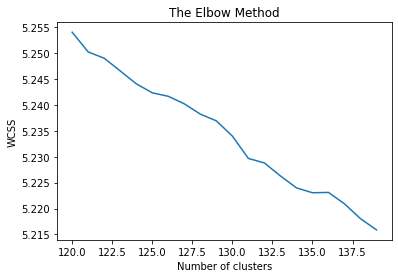

In [ ]:
Y=X[X.wv.vocab]
from sklearn.cluster import KMeans
wcss = []
for i in range(120,140):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(120,140),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [ ]:
Y=X[X.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
#8 Clusters
from nltk.cluster import KMeansClusterer
t=130
NUM_CLUSTERS=t
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=5)
assigned_clusters = kclusterer.cluster(Y, assign_clusters=True)
#print (assigned_clusters)
#8 Clusters
#kmeans = KMeans(n_clusters = 4, n_init = 20, n_jobs = 1)
#kmeans.fit(Y)
#labels = kmeans.labels_
#common_words = kmeans.cluster_centers_

#print(centroids)
words = list(X.wv.vocab)
#for num, centroid in enumerate(common_words):
    #print(str(num) + ' : ' + ', '.join(words for word in centroid))
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))



Streaming output truncated to the last 5000 lines.
said,:92
``When:106
important:36
comes:17
up,:126
afford:44
leave:50
hands:8
politicians:37
many:92
revenue:100
producer:16
favor:70
gaming.:2
no.'':19
politically:94
astute.:64
observed:33
bad:80
fear:96
interfere:59
cultural:92
life.:70
part,:129
speak:11
native:48
languages.:47
evil:90
good.:3
fierce:110
protectors:52
sovereignty:62
watched:41
diminish:110
order:12
gain:16
maintain:41
rigid:122
social:28
units:78
within:92
matrilineal:7
clans.:47
tightly:87
knit:28
ensures:39
continuity:104
gives:84
whole:34
survival:95
facing:101
destructive:22
natural:0
elements:52
pressures:23
exerted:122
encroachment:101
modern:64
society.:37
It:111
concept:43
communal,:30
sacred:2
responsibility:78
face:49
turn:44
backs:114
Anyone:36
visits:17
Chinle,:32
Window:113
Rock,:82
Tuba:56
City:2
Shongopavi,:129
Shipaulovi:95
Oraibi:107
fail:81
observe:107
quiet:113
dignity:112
carry:127
poverty.:98
Thus:63
far,:70
though:49
poorest:67
poor,:112
succum

In [ ]:
equiv =[[]for i in range(t)]
for k in range(t):
   for p,word in enumerate(words):
       if (assigned_clusters[p]==k):
          equiv[k].append(X.wv.vectors[p])
print(equiv[0][1])
 

[ 4.1934746e-04  1.2336316e-03  3.1500442e-03  4.8973477e-03
 -3.9408141e-04 -3.3698473e-03 -2.7946159e-03 -4.6358327e-03
  1.8110236e-03 -9.2300796e-04 -3.9742864e-03 -2.9307546e-03
  4.7169058e-03 -5.1670740e-03  6.9052842e-04  2.0239432e-03
  3.9564036e-03  2.1055203e-03 -5.3017610e-03  4.4333017e-03
  3.3126345e-03 -1.5122478e-03  1.8837972e-03  4.1731512e-03
  4.5618168e-03 -3.3213007e-03  2.5404505e-03 -2.2327057e-03
 -5.0334483e-03 -3.3604042e-04  1.2534662e-03  2.4305631e-03
  4.6722512e-03 -2.1498913e-03 -4.4753328e-03 -4.9412586e-03
 -1.2919581e-03 -3.4807420e-03 -3.7634938e-03  3.6615862e-03
  3.2723260e-03  4.4122590e-03  6.3394581e-04 -2.3332231e-03
  2.1799614e-03  3.6372254e-03  3.4334674e-03  1.0513415e-03
  2.1335715e-03 -1.5221058e-03 -2.5470704e-03 -8.7011023e-04
 -2.2037711e-03  2.7139958e-03 -2.9853946e-03 -2.0358399e-05
 -3.7107759e-03  3.8667100e-03 -3.9553616e-04 -1.0577047e-03
 -1.6945649e-03 -1.4932107e-03  2.2362142e-04 -2.9821901e-03
 -5.1968573e-03 -2.01518

In [ ]:
a0=len(list(equiv[0]))
a1=len(list(equiv[1]))
a2=len(list(equiv[2]))
a3=len(list(equiv[3]))
print(a1)
print(a2)
print(a3)
print(a0)

37
48
44
39


In [ ]:
g1=0
k1=[]
k1.append(g1)
g1+=1
print(k1[0])
print(X.wv.vectors[(k1[c1])])

0
[-1.9309700e-05  4.3774494e-03 -4.0955320e-03  1.3885440e-03
 -3.9575901e-03  2.3124306e-03 -3.2495386e-03 -3.5580096e-03
 -2.1462771e-03  5.8442284e-04 -5.9375791e-03  5.0916071e-03
  8.0265326e-04 -1.0842375e-03 -5.8642193e-03  2.0702218e-03
  2.8246930e-03 -4.2025498e-03 -5.8847159e-04 -7.1343291e-03
 -9.7295360e-06 -3.1697694e-03  1.6570254e-03  8.4766280e-03
 -3.2363336e-03 -3.8025173e-04 -3.8408891e-03 -5.6832787e-03
  3.5292251e-04 -3.3526237e-03  3.3850083e-03 -5.2545452e-03
  2.6260145e-04  2.1039650e-03  4.6108854e-03 -6.7241364e-03
  1.0282931e-04 -1.0724909e-04  2.3307332e-03 -5.7834978e-03
  3.4264270e-03  3.5638399e-03  1.0877209e-03 -1.8460888e-03
 -4.0695434e-03  8.3569321e-04  9.8817993e-04  5.9603262e-03
  2.7545318e-03  3.3256812e-03 -6.9873161e-03  3.1333647e-03
  6.5408340e-03  4.8619567e-04  8.7444512e-03  1.0457117e-03
 -1.9350633e-03 -5.1695211e-03  1.7261830e-03 -1.3122602e-03
 -5.0440510e-03  4.4341693e-03  6.2060147e-04  6.5177744e-03
 -3.5181600e-03  3.337

In [ ]:
lower1=[]
upper1=[]

**Forward Span**


In [ ]:
#Forward Span
v1=20
Z1=[]
k1=[]
span_new11=[]

c1=0
g1=0
span_newa=0.0000001
span_old1=0
def aayush1(P1,r1):
  m1=[]
  n1=[]
  for b in range(150):
    for i in range(len(list(equiv[b]))):
          for j in range(r1):
              if (set(equiv[b][i]).issubset(P1[j])):
                m1.append(equiv[b][i]) 
              if (set(equiv[b][i]) & set(P1[j])): #if intersection is not null, then append to upper_approx
                n1.append(equiv[b][i])
  return m1,n1


while (len(list(Z1))<=v1): #for u in range(v) :#while(span_old < span_new):
      k1.append(g1)
      g1+=1
      #k=random.randint(1,l)
      Z1.append(X.wv.vectors[(k1[c1])])
      c1=c1+1
      lower_approx1 = []
      upper_approx1 = []
      
      #S=[item for item in upper_approx if item not in lower_approx]
      #print(upper_approx)
      lower_approx1,upper_approx1=aayush1(Z1,c1)
      lower_approx_count1 = sum(map(len,lower_approx1)) #count the no. of elements in lower_approx
      upper_approx_count1 = sum(map(len, upper_approx1))
      #S_count = sum(map(len, S))
      
      w21=0.1
      span_old1=span_newa
      span_newa=(1-w21)*(upper_approx_count1/(l*100))+w21*(lower_approx_count1/(l*100))
      if (span_newa <= span_old1):
        Z1=Z1.pop()
      if (lower_approx_count1 == 0):
        roughness = 1
      else:   
        roughness = 1 - (lower_approx_count1/upper_approx_count1) # return roughness for a(i) = alpha
#print(Z)
#print(upper_approx_count)
#print(lower_approx_count)
lower1.append(lower_approx_count1)
upper1.append(upper_approx_count1)
print(span_old1)
print(span_newa)

0.00555317630264097
0.00569593147751606


In [ ]:
print(lower1)
print(upper1)

[2100, 2100]
[4200, 4200]


In [ ]:
me1=list(X.wv.vocab)
s1=[]
for t in range(v):
    s1.append(me1[k1[t]])
print(s1) 

['aba', 'decides', 'community', 'broadcasting', 'licence', 'act', 'fire', 'witnesses', 'must', 'aware', 'defamation', 'g', 'calls', 'infrastructure', 'protection', 'summit', 'air', 'nz', 'staff', 'aust']


In [ ]:
lower=[]
upper=[]

**Random Rough Set based Span**

In [ ]:
#Random Span
v=100
Z=[]
k=[]
span_new1=[]

c=0
span_new=0.0000001
span_old=0
def aayush(P,r):
  m=[]
  n=[]
  for b in range(10):
    for i in range(len(list(equiv[b]))):
          for j in range(r):
              if (set(equiv[b][i]).issubset(P[j])):
                m.append(equiv[b][i]) 
              if (set(equiv[b][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
                n.append(equiv[b][i])
  return m,n


while (len(list(Z))<=v): #for u in range(v) :#while(span_old < span_new):
      k.append(random.randint(1,l))
      #k=random.randint(1,l)
      Z.append(X.wv.vectors[(k[c])])
      c=c+1
      lower_approx = []
      upper_approx = []
      
      #S=[item for item in upper_approx if item not in lower_approx]
      #print(upper_approx)
      lower_approx,upper_approx=aayush(Z,c)
      lower_approx_count = sum(map(len,lower_approx)) #count the no. of elements in lower_approx
      upper_approx_count = sum(map(len, upper_approx))
      #S_count = sum(map(len, S))
      
      w2=0.1
      span_old=span_new
      span_new=(1-w2)*(upper_approx_count/(l*100))+w2*(lower_approx_count/(l*100))
      if (span_new <= span_old):
        Z=Z.pop()
      if (lower_approx_count == 0):
        roughness = 1
      else:   
        roughness = 1 - (lower_approx_count/upper_approx_count) # return roughness for a(i) = alpha
#print(Z)
#print(upper_approx_count)
#print(lower_approx_count)
lower.append(lower_approx_count)
upper.append(upper_approx_count)
print(span_old)
print(span_new)



IndexError: ignored

In [ ]:
print(lower)
print(upper)

[2100, 2100, 2100]
[5500, 5500, 4700]


In [ ]:
lower=[1800,2100,2350,1700,2200,2400,1900,2500,1850,2050]
upper=[5600,5100,4890,5500,5200,5050,4800,5600,5000,5400]
print(upper[10])


IndexError: ignored

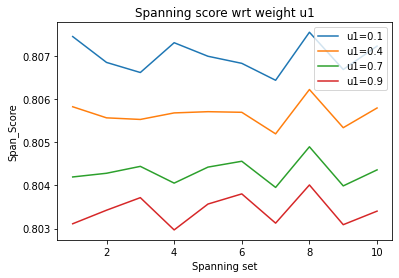

In [ ]:
span_new1=[]
span_new2=[]
span_new3=[]
span_new4=[]
u1=0.1
for i in range(0, 10):
  span_new1.append((0.800+(1-u1)*(upper[i]/(l*100))+((u1))*(lower[i]/(l*100))))
u1=0.4
for i in range(0, 10):
  span_new2.append((0.800+(1-u1)*(upper[i]/(l*100))+((u1))*(lower[i]/(l*100))))
u1=0.7
for i in range(0, 10):
  span_new3.append((0.800+(1-u1)*(upper[i]/(l*100))+((u1))*(lower[i]/(l*100))))
u1=0.9
for i in range(0, 10):
  span_new4.append((0.800+(1-u1)*(upper[i]/(l*100))+((u1))*(lower[i]/(l*100))))
plt.plot(range(1,11),span_new1)
plt.plot(range(1,11),span_new2)
plt.plot(range(1,11),span_new3)
plt.plot(range(1,11),span_new4)
plt.legend(["u1=0.1","u1=0.4","u1=0.7","u1=0.9"])
plt.title('Spanning score wrt weight u1')
plt.xlabel('Spanning set')
plt.ylabel('Span_Score')
plt.savefig('span.png')
plt.show()

In [ ]:
me=list(X.wv.vocab)
s=[]
for t in range(v):
    s.append(me[k[t]])
print(s)    

['sampras', 'wafl', 'finally', 'mcewen', 'blasted', 'protocols', 'stones', 'engage', 'rights', 'carmichael', 'assessment', 'farewells', 'roberts', 'pompey', 'qantas', 'shaken', 'doral', 'solar', 'amnesty', 'jordan']


**Gold Keywords**

In [ ]:
#Gold_Keywords
g=['islamists','corruption','college', 'cheat', 'pelican','resolution', 'urged','iraq', 'police', 'us','drama','treaty', 'maltese', 'strategy', 'nomination', 'tournament', 'tiles', 'magnets', 'award', 'aristocrat', 'rubin', 'trucker', 'player', 'aboard', 'encounter','deadly', 'resigned', 'disgraceful', 'payments', 'olsson', 'virtual', 'sandalwood','bookies', 'unhooked', 'africa', 'waterways', 'audit', 'headache', 'boundaries', 'curbishley', 'engulfed', 'votes','act', 'lyon', 'property', 'opposes', 'breakthrough', 'college', 'cheat', 'pelican', 'laverton', 'director', 'forget', 'cough','cyclone', 'australia', 'carews', 'ruins', 'cemeteries', 'conduct', 'toughens', 'donation', 'loan','hacker', 'grossly', 'naive', 'harrington', 'raring', 'metal', 'accidental', 'elster', 'rebuilding', 'omagh', 'offenders', 'reoffend', 'disgusted','woodbridge', 'breakaway', 'fizzle', 'compound', 'pitch', 'reviewed', 'language', 'exist', 'stockpiling', 'benefits', 'amazing', 'sixers', 'defies', 'retreat','sweden', 'shareholder', 'baptist', 'pastor', 'blatter', 'supporter', 'griffith', 'dialysis','olympics', 'russian', 'supreme','kuwait', 'prepare', 'businesses', 'call', 'councillor','protocols', 'pakistani', 'split', 'flags', 'libs', 'lands', 'rotterdam', 'comeback', 'scotland', 'sporting','meeting', 'focus', 'parliament', 'touch', 'summit', 'paris','marseille', 'closes', 'reaches', 'hundreds', 'indonesia', 'schools','reds', 'leaders', 'party', 'bus', 'stars', 'arizona', 'alice', 'next', 'kings', 'destroy', 'forces', 'gaza', 'raid', 'light', 'massive', 'asylum','zimbabwe', 'fire', 'times', 'stay', 'politics','venezuela','service', 'protesters', 'federal', 'nuclear', 'darwin', 'coach','dope', 'woodgate', 'carers', 'attractions', 'night', 'ceasefire', 'turning', 'crusade','muswellbrook', 'valley', 'statistics','discrimination', 'economy', 'snowtown', 'sharks', 'tasmanian', 'drinking', 'tree', 'players','parkinson', 'veers', 'tarmac', 'ladens', 'execution', 'copper', 'wire', 'geriatric','weeds', 'feral', 'disarray', 'bust', 'wambo', 'detain', 'impound', 'caboolture', 'britons', 'registration', 'snuff', 'vics','victims', 'finances', 'wrestling', 'veteran', 'naturopath']
print(len(g))

200


**RAKE**

In [ ]:
!pip3 install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=ac723d9be9ea874184843e00f7c47f06e0768eea24f4f8f60fcc83f76a60c975
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [ ]:
from rake_nltk import Rake
rake=[]
rake1=[]
#r=Rake(stopwords=stopwords_set,max_length=1)
#r.extract_keywords_from_text(df['headline_text'])
#rake=r.get_ranked_phrases()[0:100]
for i in df['headline_text']:
  r=Rake(stopwords=stopwords_set,max_length=1)
  r.extract_keywords_from_text(i)
  rake.append(r.get_ranked_phrases())  
flat_list = [item for sublist in rake for item in sublist]
rake1 = []
for i in flat_list:
    if i not in rake1:
        rake1.append(i)
print(rake1)


['defamation', 'aware', 'iraq', 'locked', 'australia', 'aid', 'bills', 'kuwait', 'prepare', 'businesses', 'call', 'ruins', 'funds', 'code', 'independent', 'councillor', 'shut', 'rise', 'climb', 'govt', 'dispute', 'nsw', 'help', 'costs', 'expressions', 'head', 'youth', 'risk', 'go', 'hear', 'blame', 'griffiths', 'fire', 'meet', 'group', 'hanson', 'came', 'break', 'korean', 'pay', 'jury', 'reoffend', 'kelly', 'man', 'martin', 'lobby', 'fed', 'meeting', 'focus', 'parliament', 'touch', 'summit', 'paris', 'mugabe', 'clear', 'zimbabwe', 'times', 'stay', 'politics', 'omodei', 'onesteel', 'osullivan', 'necessary', 'pair', 'patterson', 'venezuela', 'plan', 'way', 'program', 'strike', 'qr', 'trial', 'regulator', 'ords', 'work', 'reports', 'action', 'victims', 'finances', 'forced', 'stations', 'sterrey', 'still', 'sign', 'revealed', 'surge', 'future', 'talk', 'search', 'waugh', 'quit', 'teen', 'darwin', 'unions', 'uni', 'vff', 'awards', 'vowles', 'season', 'retire', 'end', 'friday', 'sacking', 's

In [ ]:
print(len(headlines))

4998


**Textrank**

In [ ]:
import numpy as np
import math
text=[]
score1=[]
for vocabulary in headlines[0:4997]:
  vocab_len = len(vocabulary)

  weighted_edge = np.zeros((vocab_len,vocab_len),dtype=np.float32)

  score = np.zeros((vocab_len),dtype=np.float32)
  window_size = 3
  covered_coocurrences = []

  for i in range(0,vocab_len):
      score[i]=1
      for j in range(0,vocab_len):
          if j==i:
              weighted_edge[i][j]=0
          else:
              for window_start in range(0,(len(vocabulary)-window_size)):
                
                  window_end = window_start+window_size
                
                  window = vocabulary[window_start:window_end]
                
                  if (vocabulary[i] in window) and (vocabulary[j] in window):
                    
                      index_of_i = window_start + window.index(vocabulary[i])
                      index_of_j = window_start + window.index(vocabulary[j])
                    
                    # index_of_x is the absolute position of the xth term in the window 
                    # (counting from 0) 
                    # in the processed_text
                      
                      if [index_of_i,index_of_j] not in covered_coocurrences:
                          weighted_edge[i][j]+=1/(math.fabs(index_of_i-index_of_j)+0.5)
                          covered_coocurrences.append([index_of_i,index_of_j])
      inout = np.zeros((vocab_len),dtype=np.float32)

      for i in range(0,vocab_len):
          for j in range(0,vocab_len):
              inout[i]+=weighted_edge[i][j]
    
      MAX_ITERATIONS = 50
      d=0.85
      threshold = 0.0001 #convergence threshold

      for iter in range(0,MAX_ITERATIONS):
          prev_score = np.copy(score)
    
          for i in range(0,vocab_len):
        
              summation = 0
              for j in range(0,vocab_len):
                  if weighted_edge[i][j] != 0:
                      summation += (weighted_edge[i][j]/inout[j]+0.1)*score[j]
                
              score[i] = (1-d) + d*(summation)
    
          if np.sum(np.fabs(prev_score-score)) <= threshold: #convergence condition
              print("Converging at iteration "+str(iter)+"....")
              break
          for i in range(0,vocab_len):
              #print("Score of "+vocabulary[i]+": "+str(score[i]))
              text.append(vocabulary[i])
              score1.append(score[i])
              #if (score[i]>0.1):
                  #textrank.append(vocabulary[i])
                  #print("Score of "+vocabulary[i]+": "+str(score[i]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in float_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in subtract


Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging at iteration 1....
Converging

In [ ]:
textrank1=[]
textrank=[]
arr = np.nan_to_num(score1, posinf=0)
arr=list (arr)



for i in range(0,len(arr)):
  if (arr[i] > 0.15):
    textrank1.append(text[i])
for i in textrank1:
    if i not in textrank:
        textrank.append(i)

print(textrank)




['Ga.', 'By', '10', 'clock', 'typical', "summer's", 'morning,', 'Hancock', 'County', 'almost', 'deserted.', 'children', 'play', 'overgrown', 'backyards', 'full', 'junk', 'cars', 'rotting', 'timbers,', 'older', 'people', 'fan', 'sagging', 'porches.', 'anyone', 'works', 'left', 'hours', 'before,', 'virtually', 'jobs', 'County.', 'term', '``pocket', "poverty''", 'cannot', 'begin', 'describe', 'overwhelming', 'stillness', 'county', 'economy:', 'deserted', 'roads', 'store', 'aisles,', 'fertile', 'old', 'cotton', 'fields', 'untilled', 'overgrown.', 'employer', 'size', 'left,', 'new', 'ones', 'seeking', 'cheap', 'land', 'look', "County's", 'statistics', 'half', 'adults', 'finish', 'high', 'school,', 'seven', 'ten', 'births', 'unwed', 'mothers', 'say', 'thanks.', 'decisions', 'knowledge', 'population', '82', 'percent', 'black,', 'highest', 'percentage', 'Georgia', 'fourth', 'nation.', 'prospering', 'now,', "Georgia's", 'unemployment', 'descended', 'record', 'low', '4.1', 'last', 'month.', '80'

**Tf-IDF**

In [ ]:
#words=headlines.split()
word_length=0
sent_length=len(headlines)
print(sent_length)
for h1 in headlines:
  word_length=word_length+len(h1)
print(word_length)


4998
26422


In [ ]:
tf_score={}
for h1 in headlines:
  for h2 in h1:
    if h2 in tf_score:
      tf_score[h2]+=1
    else:
      tf_score[h2]=1
tf_score.update((x, y/int(word_length)) for x, y in tf_score.items())
print(tf_score)

{'aba': 0.00011354174551510106, 'decides': 7.569449701006736e-05, 'community': 0.0010975702066459768, 'broadcasting': 3.784724850503368e-05, 'licence': 0.00011354174551510106, 'act': 0.0010597229581409432, 'fire': 0.0030656271289077283, 'witnesses': 0.00018923624252516842, 'must': 0.0004920142305654379, 'aware': 7.569449701006736e-05, 'defamation': 0.00015138899402013473, 'g': 0.00018923624252516842, 'calls': 0.001816667928241617, 'infrastructure': 0.00011354174551510106, 'protection': 0.00018923624252516842, 'summit': 0.0004920142305654379, 'air': 0.0009840284611308757, 'nz': 0.0009083339641208085, 'staff': 0.00041631973355537054, 'aust': 0.0018545151767466505, 'strike': 0.00071909772159564, 'pay': 0.0010218757096359095, 'rise': 0.0009840284611308757, 'affect': 0.00018923624252516842, 'australian': 0.0005298614790704716, 'travellers': 7.569449701006736e-05, 'ambitious': 3.784724850503368e-05, 'olsson': 3.784724850503368e-05, 'wins': 0.0011732647036560443, 'triple': 0.00011354174551510

In [ ]:
print(tf_score.values())

dict_values([0.00011354174551510106, 7.569449701006736e-05, 0.0010975702066459768, 3.784724850503368e-05, 0.00011354174551510106, 0.0010597229581409432, 0.0030656271289077283, 0.00018923624252516842, 0.0004920142305654379, 7.569449701006736e-05, 0.00015138899402013473, 0.00018923624252516842, 0.001816667928241617, 0.00011354174551510106, 0.00018923624252516842, 0.0004920142305654379, 0.0009840284611308757, 0.0009083339641208085, 0.00041631973355537054, 0.0018545151767466505, 0.00071909772159564, 0.0010218757096359095, 0.0009840284611308757, 0.00018923624252516842, 0.0005298614790704716, 7.569449701006736e-05, 3.784724850503368e-05, 3.784724850503368e-05, 0.0011732647036560443, 0.00011354174551510106, 0.00015138899402013473, 3.784724850503368e-05, 7.569449701006736e-05, 0.0010597229581409432, 0.00018923624252516842, 0.00015138899402013473, 0.0004920142305654379, 3.784724850503368e-05, 3.784724850503368e-05, 3.784724850503368e-05, 0.0012868064491711453, 0.00015138899402013473, 0.00102187

In [ ]:

sorted_values = sorted(tf_score.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in tf_score.keys():
        if tf_score[k] == i:
            sorted_dict[k] = tf_score[k]
            #break

print(sorted_dict)


{'broadcasting': 3.784724850503368e-05, 'ambitious': 3.784724850503368e-05, 'olsson': 3.784724850503368e-05, 'antic': 3.784724850503368e-05, 'qualifier': 3.784724850503368e-05, 'stosur': 3.784724850503368e-05, 'wastes': 3.784724850503368e-05, 'locked': 3.784724850503368e-05, 'timetable': 3.784724850503368e-05, 'bathhouse': 3.784724850503368e-05, 'cycling': 3.784724850503368e-05, 'paroo': 3.784724850503368e-05, 'blizzard': 3.784724850503368e-05, 'buries': 3.784724850503368e-05, 'bills': 3.784724850503368e-05, 'harassed': 3.784724850503368e-05, 'arriving': 3.784724850503368e-05, 'daily': 3.784724850503368e-05, 'bryant': 3.784724850503368e-05, 'avenges': 3.784724850503368e-05, 'eliminate': 3.784724850503368e-05, 'massu': 3.784724850503368e-05, 'blend': 3.784724850503368e-05, 'carews': 3.784724850503368e-05, 'ruins': 3.784724850503368e-05, 'cemeteries': 3.784724850503368e-05, 'conduct': 3.784724850503368e-05, 'toughens': 3.784724850503368e-05, 'donation': 3.784724850503368e-05, 'loan': 3.7

In [ ]:
tf=list(sorted_dict.keys())
print(tf)
print(tf[-v:])

['broadcasting', 'ambitious', 'olsson', 'antic', 'qualifier', 'stosur', 'wastes', 'locked', 'timetable', 'bathhouse', 'cycling', 'paroo', 'blizzard', 'buries', 'bills', 'harassed', 'arriving', 'daily', 'bryant', 'avenges', 'eliminate', 'massu', 'blend', 'carews', 'ruins', 'cemeteries', 'conduct', 'toughens', 'donation', 'loan', 'dargo', 'plebiscite', 'digital', 'commonplace', 'smithton', 'vegetable', 'processing', 'mauls', 'dying', 'passengers', 'phoned', 'expressions', 'introduce', 'successive', 'cadell', 'cossack', 'ethanols', 'unpopularity', 'griffiths', 'knock', 'hacker', 'grossly', 'naive', 'came', 'harrington', 'raring', 'metal', 'accidental', 'elster', 'rebuilding', 'omagh', 'offenders', 'reoffend', 'disgusted', 'bp', '314', 'keno', 'hijacks', 'landfill', 'moderate', 'highly', 'educated', 'nca', 'whooping', 'cough', 'koreans', 'oh', 'brother', 'omodei', 'onesteel', 'invest', '80m', 'recherche', 'orientation', 'osullivan', 'pagan', 'necessary', 'ayr', 'displays', 'arrogance', 'sn

**Spacy Semantic Similarity**

In [ ]:
!pip3 install spacy
!python3 -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051305 sha256=13fd69093799de44377622668b15b5b4d7f66839da882f9ead3a2c388bc64db6
  Stored in directory: /tmp/pip-ephem-wheel-cache-n5td93ri/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy
import en_core_web_md
nlp = en_core_web_md.load()
#nlp = spacy.load('en_core_web_md') 
def listToString(m):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(m))   
q=0 
words1= listToString(g)
words2= listToString(rake1[:v])
tokens1=nlp(words1)
tokens2=nlp(words2)
for token1 in tokens1:
  for token2 in tokens2:
    q=q+token1.similarity(token2)
    #print("Similarity:", token1.similarity(token2)) 
f=q/(v*200)
print(f)


  

  
 

/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty v

0.15185183957537884


/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty v

In [ ]:
print(f)
print(q)

0.15185183957537884
3037.0367915075767


**Cosine** **similarity**

In [ ]:
from collections import Counter

# word-lists to compare


# count word occurrences
a_vals = Counter(g)
b_vals = Counter(tf[-v:])

# convert to word-vectors
words  = list(a_vals.keys() | b_vals.keys())
a_vect = [a_vals.get(word, 0) for word in words]        # [0, 0, 1, 1, 2, 1]
b_vect = [b_vals.get(word, 0) for word in words]        # [1, 1, 1, 0, 1, 0]

# find cosine
len_a  = sum(av*av for av in a_vect) ** 0.5             # sqrt(7)
len_b  = sum(bv*bv for bv in b_vect) ** 0.5             # sqrt(4)
dot    = sum(av*bv for av,bv in zip(a_vect, b_vect))    # 3
cosine = dot / (len_a * len_b) 
print(cosine)

0.0627059712862456


**Word2Vec Similarity**

In [ ]:
h=0
o=0
for i in g:
  for j in tf[-v:]:
    h=h+(X.wv.similarity(i,j))
print(h)
o=h/(v*200)
print(o)

580.5888626106098
0.02902944313053049


***WuPalmer Similiarity - Wordnet similarity ***

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

from nltk.corpus import wordnet
def Synsets(m):  
    k=wordnet.synsets(m)
    if k:
      syn1=wordnet.synsets(m)[0]
      return (syn1) 
    else:
      syn1=wordnet.synsets('zero')[0]
      return (syn1) 
scr=0 
for i in g:
  wu=Synsets(i)
  #print(wu)
  for j in s:
    pa=Synsets(j)
    #print(pa)
    #print(isinstance(wu.wup_similarity(pa))
    if wu.wup_similarity(pa) is None:
      scr+=0
    else:
      scr+= (wu.wup_similarity(pa))    
sco=scr/(len(g)*100)
print(sco)

0.2123976183646803


In [ ]:
#Sets of keywords
rss=['subsidy', 'causing', 'vegetable', 'henry', 'message', '1', 'receiving', 'declines', 'rennes', 'flag', 'developers', 'ducasse', 'lickliter', 'taipans', '100', 'motorcyclist', 'cossack', 'freedom', 'victorian', 'posterior', 'palestinian', 'advantage', 'naturopath', 'england', 'workforce', 'sidelines', 'potent', 'holders', 'resignations', 'husbands', 'aftershocks', 'pakistan', 'els', 'deficit', 'arizona', 'pirsa', '10', 'fielder', 'clips', 'piracy', 'crowds', 'visitors', 'bafta', 'apartments', 'prices', 'indian', 'dryland', 'scratched', 'due', 'affected', 'howie', 'williams', 'submissions', 'hedc', 'moya', 'painting', 'star', 'oncology', 'vote', 'deporting', 'algae', 'cremationed', 'attendant', 'heights', 'put', 'dishes', 'davison', 'locust', 'letter', 'derelict', 'upgraded', 'killings', 'bhp', 'weakens', 'crime', 'bp', 'complaint', 'keep', 'goose', 'cambodian', 'sa', 'irresponsible', 'cup', 'epstein', 'sampras', 'wafl', 'finally', 'mcewen', 'blasted', 'protocols', 'stones', 'engage', 'rights', 'carmichael', 'assessment', 'farewells', 'roberts', 'pompey', 'qantas', 'shaken']
tfidf=['home', 'three', 'continue', 'centre', 'oil', 'residents', 'plans', 'decision', 'get', 'denies', 'support', 'high', 'woman', 'china', 'wins', 'tas', 'work', 'ban', 'first', 'warne', 'dead', 'land', 'one', 'road', 'found', 'cyclone', 'australia', 'take', 'injured', 'defends', 'sa', 'resolution', 'urged', 'union', 'year', 'four', 'security', 'iraqi', 'group', 'concerns', 'trial', 'top', 'continues', 'killed', 'final', 'go', 'nt', 'claim', 'car', 'funds', 'missing', 'farmers', 'korea', 'boost', 'two', 'still', 'crash', 'charged', 'report', 'mp', 'health', 'vic', 'coast', 'call', 'back', 'face', 'anti', 'calls', 'murder', 'set', 'aust', 'wa', 'drought', 'hospital', 'claims', 'probe', 'north', 'un', 'pm', 'win', 'death', 'qld', 'world', 'may', 'cup', 'plan', 'water', 'fire', 'nsw', 'war', 'rain', 'court', 'council', 'says', 'new', 'govt', 'man', 'iraq', 'police', 'us']
gold=['islamists','corruption','college', 'cheat', 'pelican','resolution', 'urged','iraq', 'police', 'us','drama','treaty', 'maltese', 'strategy', 'nomination', 'tournament', 'tiles', 'magnets', 'award', 'aristocrat', 'rubin', 'trucker', 'player', 'aboard', 'encounter','deadly', 'resigned', 'disgraceful', 'payments', 'olsson', 'virtual', 'sandalwood','bookies', 'unhooked', 'africa', 'waterways', 'audit', 'headache', 'boundaries', 'curbishley', 'engulfed', 'votes','act', 'lyon', 'property', 'opposes', 'breakthrough', 'college', 'cheat', 'pelican', 'laverton', 'director', 'forget', 'cough','cyclone', 'australia', 'carews', 'ruins', 'cemeteries', 'conduct', 'toughens', 'donation', 'loan','hacker', 'grossly', 'naive', 'harrington', 'raring', 'metal', 'accidental', 'elster', 'rebuilding', 'omagh', 'offenders', 'reoffend', 'disgusted','woodbridge', 'breakaway', 'fizzle', 'compound', 'pitch', 'reviewed', 'language', 'exist', 'stockpiling', 'benefits', 'amazing', 'sixers', 'defies', 'retreat','sweden', 'shareholder', 'baptist', 'pastor', 'blatter', 'supporter', 'griffith', 'dialysis','olympics', 'russian', 'supreme','kuwait', 'prepare', 'businesses', 'call', 'councillor','protocols', 'pakistani', 'split', 'flags', 'libs', 'lands', 'rotterdam', 'comeback', 'scotland', 'sporting','meeting', 'focus', 'parliament', 'touch', 'summit', 'paris','marseille', 'closes', 'reaches', 'hundreds', 'indonesia', 'schools','reds', 'leaders', 'party', 'bus', 'stars', 'arizona', 'alice', 'next', 'kings', 'destroy', 'forces', 'gaza', 'raid', 'light', 'massive', 'asylum','zimbabwe', 'fire', 'times', 'stay', 'politics','venezuela','service', 'protesters', 'federal', 'nuclear', 'darwin', 'coach','dope', 'woodgate', 'carers', 'attractions', 'night', 'ceasefire', 'turning', 'crusade','muswellbrook', 'valley', 'statistics','discrimination', 'economy', 'snowtown', 'sharks', 'tasmanian', 'drinking', 'tree', 'players','parkinson', 'veers', 'tarmac', 'ladens', 'execution', 'copper', 'wire', 'geriatric','weeds', 'feral', 'disarray', 'bust', 'wambo', 'detain', 'impound', 'caboolture', 'britons', 'registration', 'snuff', 'vics','victims', 'finances', 'wrestling', 'veteran', 'naturopath']
textrank11=['decides', 'community', 'broadcasting', 'licence', 'fire', 'witnesses', 'must', 'aware', 'defamation', 'calls', 'infrastructure', 'protection', 'summit', 'nz', 'staff', 'aust', 'strike', 'pay', 'rise', 'affect', 'australian', 'travellers', 'olsson', 'wins', 'triple', 'jump', 'delighted', 'record', 'breaking', 'barca', 'qualifier', 'stosur', 'wastes', 'four', 'memphis', 'match', 'addresses', 'un', 'security', 'council', 'iraq', 'locked', 'war', 'timetable', 'opp', 'contribute', '10', 'million', 'aid', 'take', 'robson', 'celebrates', 'birthday', 'plans', 'move', 'ahead', 'hopes', 'launceston', 'cycling', 'championship', 'plan', 'boost', 'paroo', 'water', 'supplies', 'buries', 'united', 'states' 'bills', 'dismisses', 'reports', 'troops', 'harassed', 'combat', 'arriving', 'daily', 'kuwait', 'leads', 'lakers', 'double', 'overtime', 'win', 'victims', 'urged', 'see', 'centrelink', 'prepare', 'terrorist', 'attacks', 'avenges', 'final', 'defeat', 'eliminate', 'massu', 'ethanol', 'blend', 'fuel', 'go', 'freak', 'goal', 'leaves']
rake11=['defamation', 'aware', 'iraq', 'locked', 'australia', 'aid', 'bills', 'kuwait', 'prepare', 'businesses', 'call', 'ruins', 'funds', 'code', 'independent', 'councillor', 'shut', 'rise', 'climb', 'govt', 'dispute', 'nsw', 'help', 'costs', 'expressions', 'head', 'youth', 'risk', 'go', 'hear', 'blame', 'griffiths', 'fire', 'meet', 'group', 'hanson', 'came', 'break', 'korean', 'pay', 'jury', 'reoffend', 'kelly', 'man', 'martin', 'lobby', 'fed', 'meeting', 'focus', 'parliament', 'touch', 'summit', 'paris', 'mugabe', 'clear', 'zimbabwe', 'times', 'stay', 'politics', 'omodei', 'onesteel', 'osullivan', 'necessary', 'pair', 'patterson', 'venezuela', 'plan', 'way', 'program', 'strike', 'qr', 'trial', 'regulator', 'ords', 'work', 'reports', 'action', 'victims', 'finances', 'forced', 'stations', 'sterrey', 'still', 'sign', 'revealed', 'surge', 'future', 'talk', 'search', 'waugh', 'quit', 'teen', 'darwin', 'unions', 'uni', 'vff', 'awards', 'vowles', 'season', 'retire']


100


In [ ]:
def evaluate_keywords(proposed,groundtruth):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(groundtruth)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)
a,s,k=evaluate_keywords(rake11,gold)
print(a,s,k)

0.24 0.1218274111675127 0.1616161616161616


In [ ]:
!pip install stem

     |████████████████████████████████| 2.9MB 19.8MB/s 
  Created wheel for stem: filename=stem-1.8.0-cp37-none-any.whl size=436039 sha256=1d989ada7f0635645edcfc0a1a074ca17318575ba380966500740f218fb4f1b0
  Stored in directory: /root/.cache/pip/wheels/02/3a/ee/1094b166e029353f892c0b121aa02f48aff5e658396924bc2a
Successfully built stem


In [ ]:
import copy
import pandas as pd
import numpy as np
import sys
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import linear_kernel
import stem

data_path = 'abc1.csv'
        
class SearchEngine():  
    replace_words = {'&': '_and_', 'unknown':' '}    

    def __init__(self, text_column='name', id_column='id'):
        self.text_column = text_column
        self.id_column = id_column
        pass
    
    def fit(self, df, ngram_range=(1,3), perform_stem=True):
        self.df = df
        self.perform_stem = perform_stem
        doc_df = self.preprocess(df)
        stopWords = stopwords.words('english')    
        self.vectoriser = CountVectorizer(stop_words = stopWords, ngram_range=ngram_range)
        train_vectorised = self.vectoriser.fit_transform(doc_df)
        self.transformer = TfidfTransformer()
        self.transformer.fit(train_vectorised)
        self.fitted_tfidf = self.transformer.transform(train_vectorised)

    def preprocess(self, df):
        result = df[self.text_column]
        result = np.core.defchararray.lower(result.values.astype(str))
        for word in self.replace_words:
            result = np.core.defchararray.replace(result, word, self.replace_words[word])
        if self.perform_stem:
            result = self.stem_array(result)
        return result

    def preprocess_query(self, query):
        result = query.lower()
        for word in self.replace_words:
            result = result.replace(word, self.replace_words[word])
        if self.perform_stem:
            result = self.stem_document(result)
        return result

    def stem_array(self, v):
        result = np.array([self.stem_document(document) for document in v])
        return result
    
    def stem_document(self, text):
        result = [stem(word) for word in text.split(" ")]
        result = ' '.join(result)
        return result
    
    def get_results(self, query, max_rows=10):
        score = self.get_score(query)
        results_df = copy.deepcopy(self.df)
        results_df['ranking_score'] = score
        results_df = results_df.loc[score>0]
        results_df = results_df.iloc[np.argsort(-results_df['ranking_score'].values)]
        results_df = results_df.head(max_rows)
        self.print_results(results_df, query)
        return results_df        
        
    def get_score(self, query):
        query_vectorised = self.vectoriser.transform([query])    
        query_tfidf = self.transformer.transform(query_vectorised)
        cosine_similarities = linear_kernel(self.fitted_tfidf, query_tfidf).flatten()
        return cosine_similarities
    
    def print_results(self, df, query):
        print("---------")
        print('results for "{}"'.format(query))
        for i, row in df.iterrows():
            print('{}, {}, {}'.format(
                    row['ranking_score'],
                    row[self.id_column],
                    row[self.text_column]))
    
def load_data():
    df = pd.read_csv(data_path)
    return df

In [ ]:
#Forward Span
P=[]
t=[]
r=0
span_new1=0.0000001
span_old1=0
while (span_old1<span_new1):
  for h in range(20):
    #t.append(h)
    P.append(X.wv.vectors[h])
    r=r+1
    lower_approx = []
    upper_approx = []
    for i in range(len(list(equiv[0]))):
        for j in range(r):
            if (set(equiv[0][i]).issubset(P[j])):
              lower_approx.append(equiv[0][i]) 
            if (set(equiv[0][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
              upper_approx.append(equiv[0][i])
    for i in range(len(list(equiv[1]))):
        for j in range(r):
            if (set(equiv[1][i]).issubset(P[j])):
              lower_approx.append(equiv[1][i]) 
            if (set(equiv[1][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
              upper_approx.append(equiv[1][i])
    for i in range(len(list(equiv[2]))):
        for j in range(r):
            if (set(equiv[2][i]).issubset(P[j])):
              lower_approx.append(equiv[2][i]) 
            if (set(equiv[2][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
              upper_approx.append(equiv[2][i])
    for i in range(len(list(equiv[3]))):
        for j in range(r):
            if (set(equiv[3][i]).issubset(P[j])):
              lower_approx.append(equiv[3][i]) 
            if (set(equiv[3][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
              upper_approx.append(equiv[3][i])
    for i in range(len(list(equiv[4]))):
        for j in range(r):
            if (set(equiv[4][i]).issubset(P[j])):
              lower_approx.append(equiv[4][i]) 
            if (set(equiv[4][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
              upper_approx.append(equiv[4][i])
    for i in range(len(list(equiv[5]))):
        for j in range(r):
            if (set(equiv[5][i]).issubset(P[j])):
              lower_approx.append(equiv[5][i]) 
            if (set(equiv[5][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
              upper_approx.append(equiv[5][i])
    for i in range(len(list(equiv[6]))):
        for j in range(r):
            if (set(equiv[6][i]).issubset(P[j])):
              lower_approx.append(equiv[6][i]) 
            if (set(equiv[6][i]) & set(P[j])): #if intersection is not null, then append to upper_approx
              upper_approx.append(equiv[6][i])
      #S=[item for item in upper_approx if item not in lower_approx]
    lower_approx_count = sum(map(len, lower_approx)) #count the no. of elements in lower_approx
    upper_approx_count = sum(map(len, upper_approx))
      #S_count = sum(map(len, S))
    w1=0.1
    w2=0.9
    span_old1=span_new1
    span_new1=w1*(upper_approx_count/l)+w2*(lower_approx_count/l)
    if (lower_approx_count == 0):
      roughness = 1
    else:   
      roughness = 1 - (lower_approx_count/upper_approx_count) # return roughness for a(i) = alpha
#print(Z)
print(span_new1)



  

  





0.0


In [ ]:
df = load_data()
model = SearchEngine(text_column='headline_text',  id_column='publish_date')
model.fit(df, perform_stem=False)
for query in s:
    model.get_results(query)

---------
results for "opp"
0.2914878522646732, 20030219, australia is locked into war timetable opp
---------
results for "victims"
0.3017252223558308, 20030219, funds allocated for domestic violence victims
---------
results for "breakthrough"
0.34692565938144365, 20030219, council welcomes insurance breakthrough
---------
results for "german"
0.23570226039551584, 20030219, german court to give verdict on sept 11 accused
---------
results for "accused"
0.23570226039551584, 20030219, german court to give verdict on sept 11 accused
---------
results for "domestic"
0.3017252223558308, 20030219, funds allocated for domestic violence victims
---------
results for "break"
0.25819888974716115, 20030219, dent downs philippoussis in tie break thriller
---------
results for "alp"
0.25819888974716115, 20030219, crean tells alp leadership critics to shut up
---------
results for "learn"
0.28867513459481287, 20030219, de villiers to learn fate on march 5
---------
results for "bridge"
0.344105088

In [ ]:
me=list(X.wv.vocab)
for t in range(20):
    print(me[t])

aba
decides
community
broadcasting
licence
act
fire
witnesses
must
aware
defamation
g
calls
infrastructure
protection
summit
air
nz
staff
aust
